In [2]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()

In [3]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
exportPlots = True

# Timestep Cost Analysis of Pressure- and Density-Based Methods
**Tony Saad** <br/>
**Department of Chemical Engineering, University of Utah**

For an explicit compressible algorithm the maximum timestep one can take is dictated by both the advective and acoustic speeds in the flow. This is given by the famous CFL condition
\begin{equation}
V \frac{\delta t}{\Delta x} \leq 1
\end{equation}
where $V$ is the maximum speed in the flow. In this case,
\begin{equation}
V = u + c
\end{equation}
where $u$ is the advective speed and $c$ is the speed of sound. 
One can turn this into useful quantities in terms of the Mach number, $M=\frac{u}{c}$.
## Number of Timesteps
One such useful quantity is the number of timesteps required to advect a fluid front a single grid point, $\Delta x$. In a single timestep, $\delta t$, the fluid moves (by advection) by a distance $\delta x = u \delta t$. Assume it takes $n$ timesteps of size $\delta t$ to move a distance equal to the grid spacing $\Delta x$. In other words, let $\Delta t = n \delta t$ such that it takes $\Delta x = u \Delta t$. Now
\begin{equation}
\Delta t = n\delta t = n \frac{\Delta x}{V}
\end{equation}
or
\begin{equation}
n = V \frac{\Delta t}{\Delta x} = (u+c)\frac{\Delta t}{\Delta x}
\end{equation}
now divide by the speed of sound, $c$
\begin{equation}
n = (M+1)\frac{c\Delta t}{\Delta x}
\end{equation}
but, recall that the fluid front moves at the advective velocity $u$ such that $\Delta x = u \Delta t$, this means
\begin{equation}
    \label{eq:ndt}
    n = (M+1)\frac{c}{u} = \frac{M+1}{M} = 1 + \frac{1}{M}
\end{equation}

## Courant Number
Another useful quantity is the (advective) Courant number ($\text{Cr} = u\frac{\delta t}{\Delta x}$) as a function of the Mach number. This one is easy. Starting with
\begin{equation}
\delta t = \frac{\Delta x}{V} = \frac{\Delta x}{u+c}
\end{equation}
multiply both sides by $\frac{u}{\Delta x}$
\begin{equation}
\frac{u}{\Delta x}\delta t = \frac{u}{\Delta x} \frac{\Delta x}{u+c}
\end{equation}
or
\begin{equation}
    \label{eq:courant}
    \text{Cr} = \frac{u}{u+c} = \frac{M}{M+1}
\end{equation}

## Let's Create some Plots

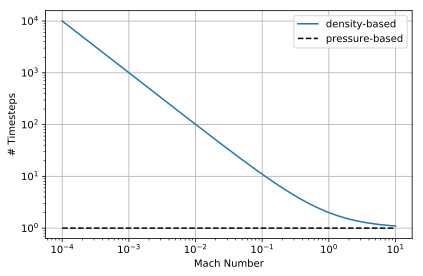

In [13]:
M=np.linspace(1e-4,10,5000)
nsteps = lambda M: 1.0 + 1.0/M
courant = lambda M: M/(M+1.0)

plt.loglog(M,nsteps(M),label='density-based')
plt.hlines(1,1e-4,10,linestyles='dashed',label='pressure-based')
# plt.vlines(0.3,0,1)
plt.legend()
plt.xlabel('Mach Number')
plt.ylabel('# Timesteps')
plt.grid()
# plt.title('# of timesteps it takes a density-based algorithm to advect a fluid front by a single grid point')
plt.tight_layout()
if exportPlots:
    plt.savefig('nsteps-vs-mach-1.pdf',transparent=True)
plt.show()

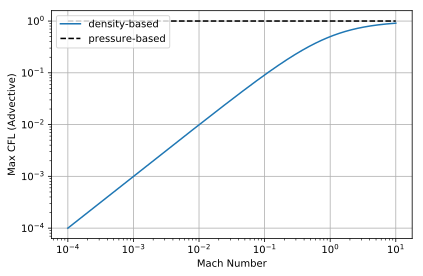

In [5]:
plt.loglog(M,courant(M),label='density-based')
plt.hlines(1,1e-4,10,linestyles='dashed',label='pressure-based')
# plt.vlines(0.3,0,1)
plt.legend()
plt.xlabel('Mach Number')
plt.ylabel('Max CFL (Advective)')
plt.grid()
plt.tight_layout()
if exportPlots:
    plt.savefig('nsteps-vs-mach.pdf',transparent=True)
plt.show()

## Acoustic Stiffness Reduction (ASR)
To alleviate this strict limitation on the timestep size, several techniques have been introduced to manipulate the speed of sound in the governing equations without modifying much of the dynamics. One popular approach is the ASR method. The technique results in effectively scaling the speed of sound by a factor, $\alpha$, such that
\begin{equation}
c \to \frac{c}{\alpha}; \quad \alpha > 1
\end{equation}
This means that the Mach number gets amplified by a factor $\alpha$, i.e. $M\to\alpha M$. 
This changes \eqref{eq:ndt} to
\begin{equation}
n =\frac{\alpha M + 1}{\alpha M}= 1 + \frac{1}{\alpha M}
\end{equation}
and \eqref{eq:courant} to
\begin{equation}
\text{Cr} = \frac{\alpha M}{\alpha M+1}
\end{equation}


In [6]:
asrCFL = lambda a,M: a*M/(a*M + 1.0)
asrNSteps = lambda a,M: (a*M + 1.0)/(a*M)

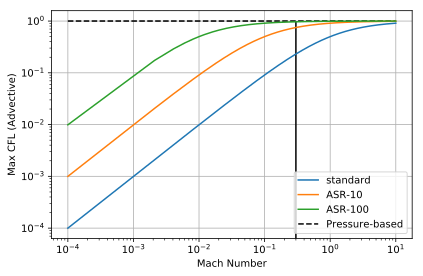

In [7]:
plt.loglog(M,asrCFL(1,M),label='standard')
plt.loglog(M,asrCFL(10,M),label='ASR-10')
plt.loglog(M,asrCFL(100,M),label='ASR-100')
# plt.loglog(M,asrCFL(500,M),label='ASR-500')
plt.hlines(1,1e-4,10,linestyles='dashed',label='Pressure-based')
plt.vlines(0.3,0,1)
plt.legend()
plt.xlabel('Mach Number')
plt.ylabel('Max CFL (Advective)')
plt.grid()
plt.tight_layout()
if exportPlots:
    plt.savefig('cfl-vs-mach.pdf',transparent=True)
plt.show()

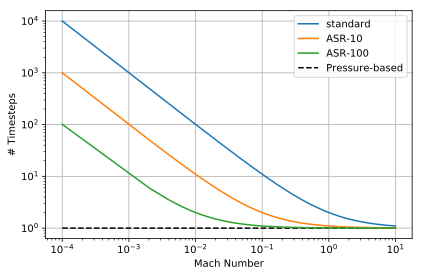

In [8]:
plt.loglog(M,asrNSteps(1,M),label='standard')
plt.loglog(M,asrNSteps(10,M),label='ASR-10')
plt.loglog(M,asrNSteps(100,M),label='ASR-100')
# plt.loglog(M,asrCFL(500,M),label='ASR-500')
plt.hlines(1,1e-4,10,linestyles='dashed',label='Pressure-based')
# plt.vlines(0.3,0,1)
plt.legend()
plt.xlabel('Mach Number')
plt.ylabel('# Timesteps')
plt.grid()
plt.tight_layout()
if exportPlots:
    plt.savefig('nsteps-vs-mach.pdf',transparent=True)
plt.show()

## Cost Analysis
The plots shown above compare pressure-based to conditioned and unconditioned density-based methods. But they do not compare cost. The real question is: what if the cost of a single pressure-based timestep is 10 times that of an ASR-100 timestep? Where is the break-even Mach number? Here, the break-even Mach number is defined as the Mach number below which pressure-based methods cost less in terms of time-to-solution and above which density-based methods cost less (in terms of time-to solution).
We can cleverly estimate this cost as follows.
Define the cost ratio, $r$ as the ratio of the cost per timestep of a pressure-based method to that of a density-based method,
\begin{equation}
r = \frac{\text{cost per timestep of pressure-based}}{\text{cost per timestep of density-based}} = \frac{p\text{-cost}}{\rho\text{-cost}}
\end{equation}
Now, for a density based method, it takes $n$ steps to move a fluid front by one grid point. The cost for that operation is 
\begin{equation}
\rho\text{-cost}\times n = \rho\text{-cost}\times\frac{\alpha M + 1}{\alpha M}
\end{equation}
For a pressure based method, by definition, it takes a single timestep to move a fluid front by a single grid point. This operation costs $p\text{-cost}$.
The breakeven Mach number is when those two are equal, i.e.
\begin{equation}
\rho\text{-cost}\times n = p\text{-cost}
\end{equation}
or, dividing by $\rho\text{-cost}$ and substituting for the value of $n$, we have
\begin{equation}
\frac{\alpha M_\text{breakeven} + 1}{\alpha M_\text{breakeven}} = r
\end{equation}
or
\begin{equation}
M_\text{breakeven} = \frac{1}{\alpha (r-1)}
\end{equation}

In [9]:
machbreak = lambda a, r: 1.0/(a*(r-1))

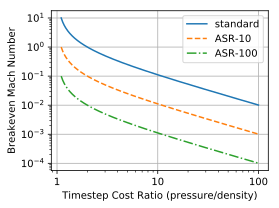

In [10]:
r = np.linspace(1.1,100,5000)
plt.figure(figsize=(4,3))
plt.loglog(r,machbreak(1,r),label='standard')
plt.loglog(r,machbreak(10,r),'--',label='ASR-10')
plt.loglog(r,machbreak(100,r),'-.',label='ASR-100')
plt.xticks([1,10,100],labels=['1','10','100'])
plt.legend()
plt.xlabel('Timestep Cost Ratio (pressure/density)')
plt.ylabel('Breakeven Mach Number')
plt.grid()
plt.tight_layout()
if exportPlots:
    plt.savefig('BreakevenMachNumbers.pdf',transparent=True)
plt.show()